In [1]:
! pip install folium

You should consider upgrading via the 'c:\users\hwang\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
print(folium.__version__)

0.11.0


In [3]:
import pandas as pd
people2019 = pd.read_csv('data\\서울시 고령자현황 (구별) 통계 2019.txt', sep='\t', engine = 'python', encoding ='utf-8')
people2019

,기간,지역,전체인구,전체인구.1,전체인구.2,65세이상 인구,65세이상 인구.1,65세이상 인구.2,65세이상 인구.3,65세이상 인구.4,65세이상 인구.5,65세이상 인구.6,65세이상 인구.7,65세이상 인구.8
0,기간,지역,전체인구,전체인구,전체인구,합계,합계,합계,내국인,내국인,내국인,등록외국인,등록외국인,등록외국인
1,기간,지역,계,남자,여자,계,남자,여자,계,남자,여자,계,남자,여자
2,2019,합계,"10,010,983","4,877,725","5,133,258","1,485,272","656,595","828,677","1,478,664","653,108","825,556","6,608","3,487","3,121"
3,2019,종로구,"161,869","78,215","83,654","27,519","12,162","15,357","27,318","12,049","15,269",201,113,88
4,2019,중구,"136,488","66,823","69,665","23,275","10,247","13,028","22,974","10,081","12,893",301,166,135
5,2019,용산구,"245,185","119,599","125,586","38,791","16,466","22,325","38,346","16,196","22,150",445,270,175
6,2019,성동구,"308,979","150,861","158,118","43,947","19,181","24,766","43,796","19,100","24,696",151,81,70
7,2019,광진구,"366,972","176,917","190,055","47,902","21,360","26,542","47,681","21,249","26,432",221,111,110
8,2019,동대문구,"363,023","178,490","184,533","59,350","26,397","32,953","59,170","26,316","32,854",180,81,99
9,2019,중랑구,"402,024","199,006","203,018","65,164","29,136","36,028","65,065","29,087","35,978",99,49,50


In [4]:
old_people2019 = people2019.loc[:,['기간','지역','전체인구','65세이상 인구']]
old_people2019

,기간,지역,전체인구,65세이상 인구
0,기간,지역,전체인구,합계
1,기간,지역,계,계
2,2019,합계,"10,010,983","1,485,272"
3,2019,종로구,"161,869","27,519"
4,2019,중구,"136,488","23,275"
5,2019,용산구,"245,185","38,791"
6,2019,성동구,"308,979","43,947"
7,2019,광진구,"366,972","47,902"
8,2019,동대문구,"363,023","59,350"
9,2019,중랑구,"402,024","65,164"


In [5]:
people_loc = old_people2019.drop([0,1])
people_loc

,기간,지역,전체인구,65세이상 인구
2,2019,합계,"10,010,983","1,485,272"
3,2019,종로구,"161,869","27,519"
4,2019,중구,"136,488","23,275"
5,2019,용산구,"245,185","38,791"
6,2019,성동구,"308,979","43,947"
7,2019,광진구,"366,972","47,902"
8,2019,동대문구,"363,023","59,350"
9,2019,중랑구,"402,024","65,164"
10,2019,성북구,"454,744","70,850"
11,2019,강북구,"317,695","60,577"


In [6]:
state_geo = 'TL_SCCO_SIG_WGS84.json'
state_geo

'TL_SCCO_SIG_WGS84.json'

In [7]:
m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)
m

In [8]:
people65 = people_loc.loc[:,['지역','65세이상 인구']]
people65 = people65.set_index('지역')
people65 = people65.drop('합계')

In [9]:
people65['65세이상 인구'] = people65['65세이상 인구'].str.replace(',','')
people65 = people65.astype({'65세이상 인구':int})

In [10]:
import json
geo_path = 'data\\02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [11]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = people65['65세이상 인구'],
               columns = [people65.index, people65['65세이상 인구']],
               fill_color = 'PuRd', #puRd, YlGnBu
               key_on = 'feature.id')

C:\Users\Hwang\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [12]:
people65.dtypes

65세이상 인구    int32
dtype: object

In [13]:
map

## 자치구별 65세 이상 인구 수 

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import matplotlib
sns.set()

In [17]:

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

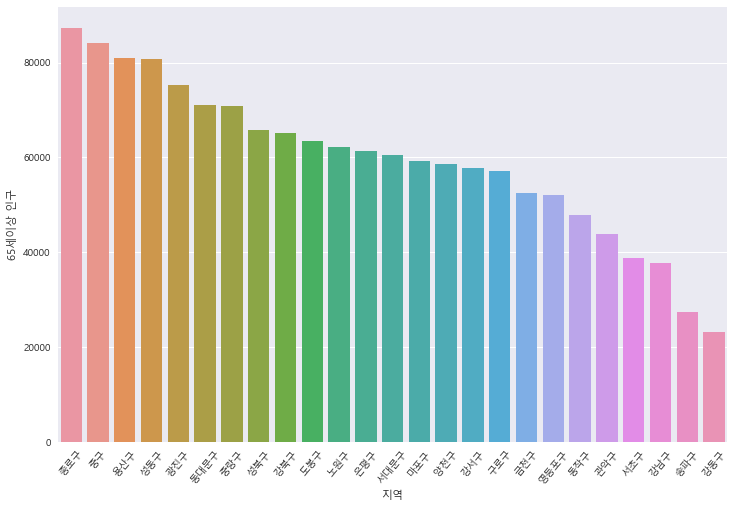

In [21]:
plt.figure(figsize=(12,8))
plt.xticks(rotation = 50)
sns.barplot(
data = people65.sort_values(by='65세이상 인구',ascending=False),
x = people65.index,
y = '65세이상 인구'
)
plt.savefig('.\\img\\old_gu.png')
plt.show()